#Import library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#Linear Regression model

## Data preparation

In [2]:
#First Example
#Import Dataset
#https://www.kaggle.com/bumba5341/advertisingcsv
filePath = os.path.join(os.getcwd(), 'datasets', 'Advertising dataset.csv')

df = pd.read_csv(filePath)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Drop Unnamed: 0 from the dataframe
df.drop('Unnamed: 0',axis = 1,inplace = True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Show statistcal values
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df[['TV']]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


<AxesSubplot:ylabel='Density'>

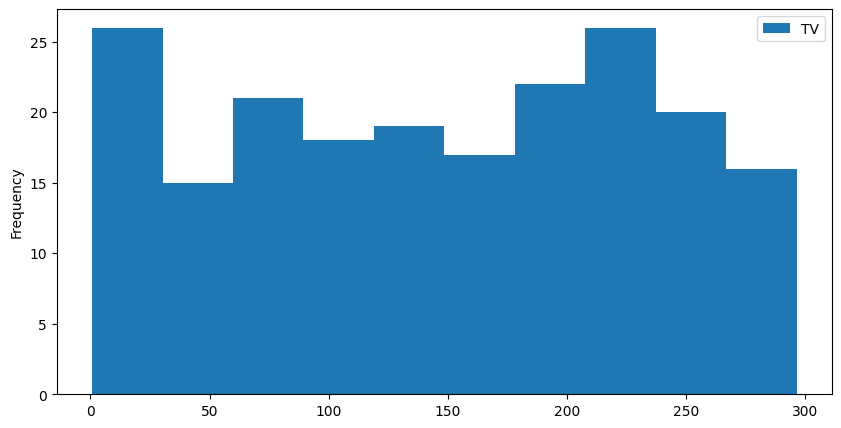

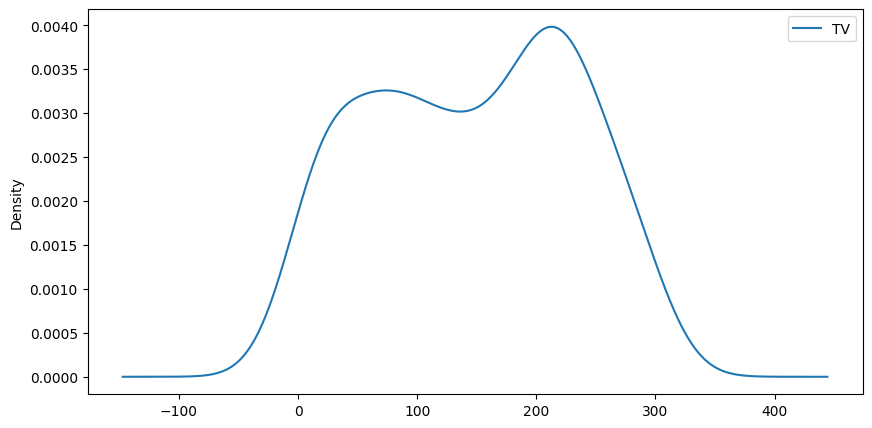

In [6]:
#Plot histogram
df[['TV']].plot.hist(figsize=(10,5))
#Plot destribution
df[['TV']].plot.density(figsize=(10,5))

<AxesSubplot:ylabel='Density'>

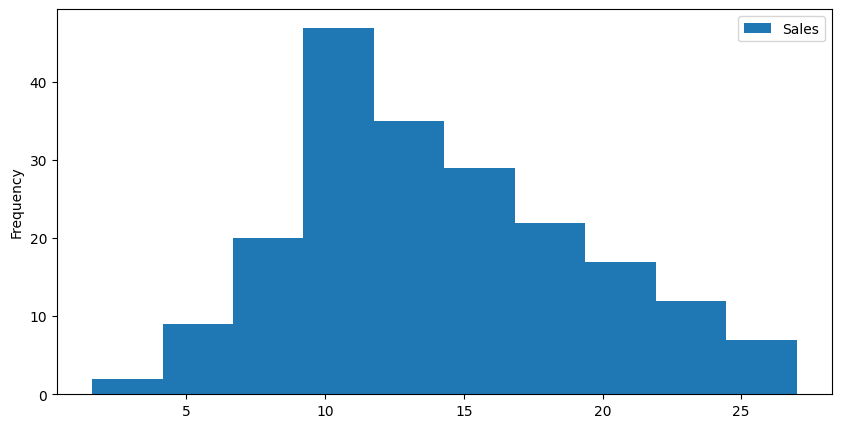

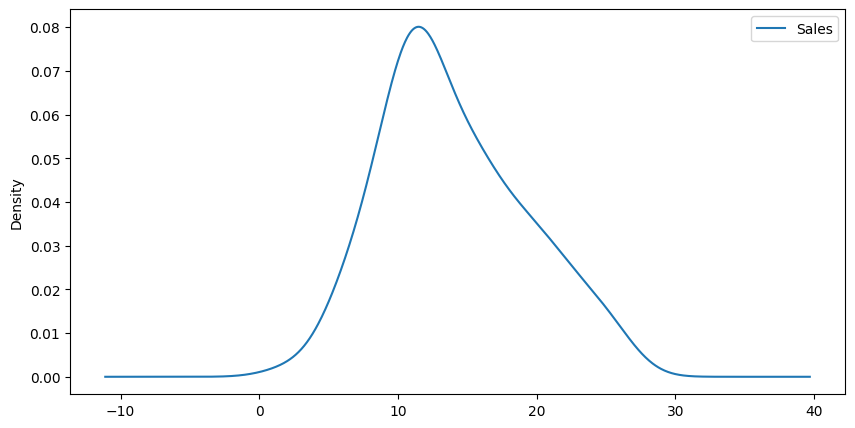

In [7]:
#Plot histogram
df[['Sales']].plot.hist(figsize=(10,5))
#Plot destribution
df[['Sales']].plot.density(figsize=(10,5))

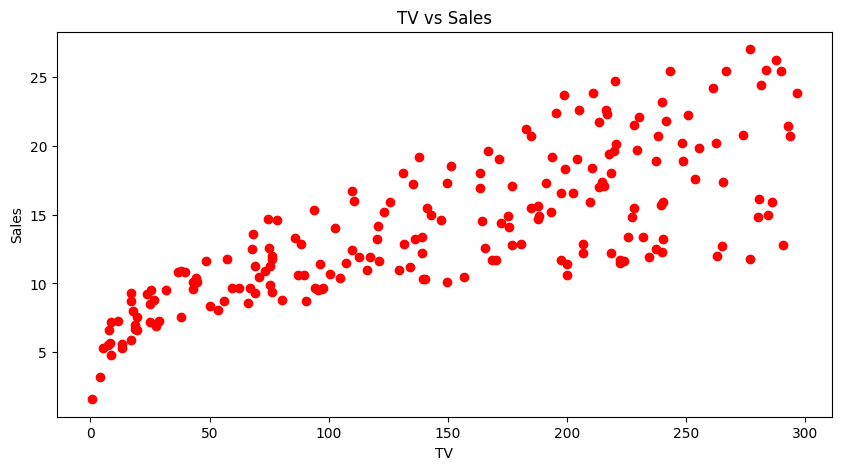

In [8]:
#Plot dataset of TV vs Sales
plt.figure(figsize = (10,5))
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.plot(df.TV,df.Sales,'or')
plt.show()

## Model building

In [9]:
#import machine learning library (Linear regression model)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
#Data preparation by spilting data to trainig and testing
x = df.TV.values.reshape(-1,1)
y = df.Sales.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [11]:
# Show size of training and testing 
print('Size of x training:',len(x_train))
print('Size of y training:',len(y_train))
print('Size of x testing:',len(x_test))
print('Size of y testing:',len(y_test))

Size of x training: 160
Size of y training: 160
Size of x testing: 40
Size of y testing: 40


In [12]:
#Build linear regression model
model_linear = LinearRegression()
model_linear.fit(x_train,y_train)

#y = theta0 + theta1*x
print("Theta0: ",model_linear.intercept_[0])
print("Theta1: ",model_linear.coef_[0][0])
print("y = {:.4f}+{:.4f}x".format(model_linear.intercept_[0],model_linear.coef_[0][0]))

Theta0:  7.292493773559356
Theta1:  0.04600778960301721
y = 7.2925+0.0460x


## Results

In [13]:
y_pred = model_linear.predict(x_train)
y_pred

array([[ 8.99018121],
       [ 8.74173915],
       [13.86700691],
       [16.93572647],
       [17.20257165],
       [12.01749377],
       [ 7.68816076],
       [ 8.07002542],
       [13.07567293],
       [12.10490857],
       [12.34414907],
       [17.85128149],
       [18.96927077],
       [15.79933407],
       [ 9.34904197],
       [10.15877907],
       [20.76817535],
       [15.22883748],
       [16.60907117],
       [ 7.62835064],
       [19.49375958],
       [16.383633  ],
       [17.3451958 ],
       [14.06944118],
       [15.17362813],
       [17.30838957],
       [19.3787401 ],
       [14.81476737],
       [11.91167585],
       [10.80288812],
       [15.79933407],
       [13.47133992],
       [19.88482579],
       [20.92920261],
       [11.71844313],
       [12.34414907],
       [19.04288324],
       [16.68268363],
       [18.33896406],
       [16.20420262],
       [16.08458237],
       [11.4193925 ],
       [ 9.27082873],
       [ 9.04999134],
       [ 7.89519582],
       [18

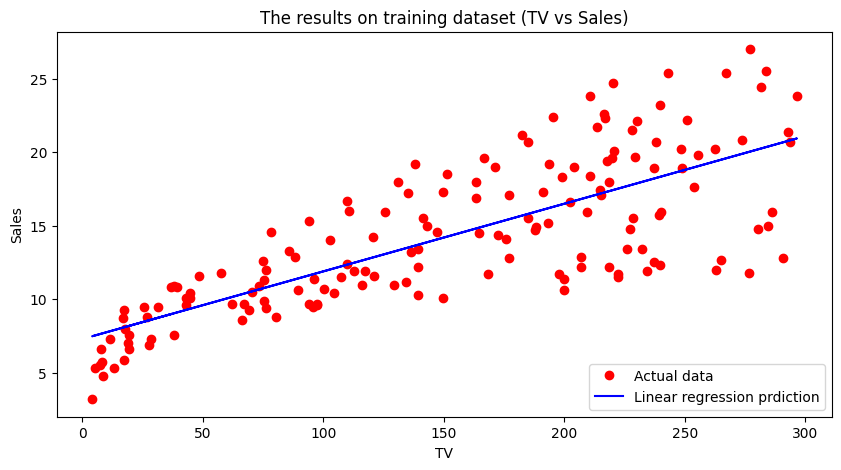

In [14]:
#Predict on trainig set
y_pred = model_linear.predict(x_train)

#Plot lineae regression line vs actual data on training set
plt.figure(figsize = (10,5))
plt.title('The results on training dataset (TV vs Sales)')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.plot(x_train,y_train,'or',label = 'Actual data')
plt.plot(x_train,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()


In [15]:
# Model measurement on trainig dataset
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAE = ",round(metrics.mean_absolute_error(y_train,y_pred),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_train,y_pred),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_train,y_pred)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_train,y_pred),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_train,y_pred)),4)) #R-Square

MAE =  2.5787
MSE =  10.6172
RMSE =  3.2584
MAPE =  19.5395
R-Square =  0.7671


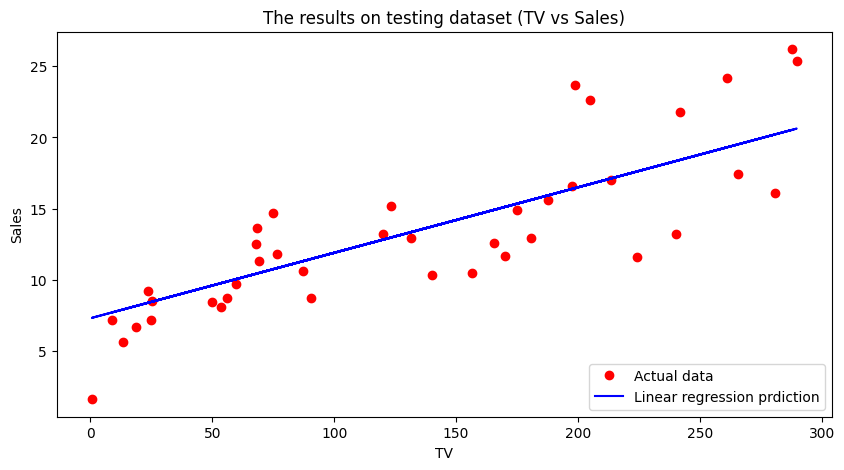

In [16]:
#Predict on testing set
y_pred = model_linear.predict(x_test)

#Plot lineae regression line vs actual data on testing set
plt.figure(figsize = (10,5))
plt.title('The results on testing dataset (TV vs Sales)') 
plt.xlabel('TV')
plt.ylabel('Sales')
plt.plot(x_test,y_test,'or',label = 'Actual data')
plt.plot(x_test,y_pred,'-b',label="Linear regression prdiction")
plt.legend(loc="lower right")
plt.show()


In [17]:
print("MAE = ",round(metrics.mean_absolute_error(y_test,y_pred),4)) #mean absolute error
print("MSE = ",round(metrics.mean_squared_error(y_test,y_pred),4)) #mean square error
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),4)) #root mean square error
print("MAPE = ",round(MAPE(y_test,y_pred),4)) #mean absolute percentage error
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_test,y_pred)),4)) #R-Square

MAE =  2.5054
MSE =  10.1862
RMSE =  3.1916
MAPE =  26.4032
R-Square =  0.8224


#Multiple Linear Regression

## Data preparation

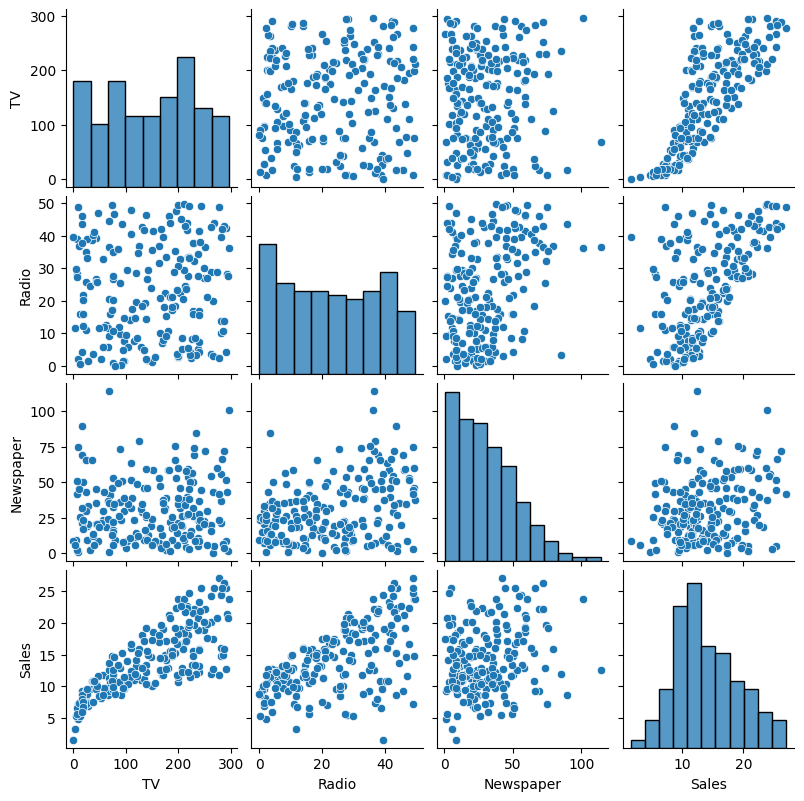

In [18]:
# Statistcal analysis
import seaborn as sns
g = sns.pairplot(df)
g.fig.set_size_inches(8,8)

In [19]:
#import machine learninglibrary
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
#Data preparation
x = df[["TV","Radio"]].values
y = df.Sales.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [21]:
print('Size of x training:',len(x_train))
print('Size of y training:',len(y_train))
print('Size of x testing:',len(x_test))
print('Size of y testing:',len(y_test))

Size of x training: 160
Size of y training: 160
Size of x testing: 40
Size of y testing: 40


## Model building

In [22]:
#Build linear regression model
model_MultiLinear = LinearRegression()
model_MultiLinear.fit(x_train,y_train)

#y = theta0 + theta1*x1 +theta2*x2
print("Theta0: ",model_linear.intercept_[0])
print("Theta1: ",model_MultiLinear.coef_[0][0])
print("Theta2: ",model_MultiLinear.coef_[0][1])
print("y = {:.4f}+{:.4f}x1+{:.4f}x2".format(model_MultiLinear.intercept_[0],model_MultiLinear.coef_[0][0],model_MultiLinear.coef_[0][1]))

Theta0:  7.292493773559356
Theta1:  0.044516392320448094
Theta2:  0.19520741125480504
y = 2.9514+0.0445x1+0.1952x2


In [23]:
model_MultiLinear.coef_

array([[0.04451639, 0.19520741]])

## Results

In [24]:
#Predict on trainig set
y_pred = model_MultiLinear.predict(x_train)

In [25]:
# Model measurement on trainig dataset
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAE = ",round(metrics.mean_absolute_error(y_train,y_pred),4))
print("MSE = ",round(metrics.mean_squared_error(y_train,y_pred),4))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_train,y_pred)),4))
print("MAPE = ",round(MAPE(y_train,y_pred),4))
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_train,y_pred)),4))


MAE =  1.2132
MSE =  2.4099
RMSE =  1.5524
MAPE =  11.4319
R-Square =  0.9522


In [26]:
#Predict on testing set
y_pred = model_MultiLinear.predict(x_test)

In [27]:
print("MAE = ",round(metrics.mean_absolute_error(y_test,y_pred),4))
print("MSE = ",round(metrics.mean_squared_error(y_test,y_pred),4))
print("RMSE = ",round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),4))
print("MAPE = ",round(MAPE(y_test,y_pred),4))
print("R-Square = ",round(np.sqrt(metrics.r2_score(y_test,y_pred)),4))

MAE =  1.3724
MSE =  4.3914
RMSE =  2.0956
MAPE =  24.6474
R-Square =  0.9276
